# **Assignment-3 - Question-1**

**Team Members**
- Pavan Pandya
- Nisarg Shah
- Prachi Jethava
- Ruturaj Marathe

## **Importing Required Libraries**

In [ ]:
!conda install scikit-learn pandas tensorflow opencv matplotlib seaborn -y

In [2]:
import os
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import time

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib.ticker import FixedLocator, FixedFormatter
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.manifold import TSNE, LocallyLinearEmbedding, MDS
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

from scipy.spatial import procrustes
from scipy.stats import pearsonr
import glob
from zipfile import ZipFile

## **Loading Dataset**

In [3]:
# zip_path = '/content/drive/MyDrive/AML/assignment-3/360 Rocks.zip' # pavan's path
zip_path = '/content/drive/MyDrive/Applied Machine Learning/Assignment-3/Question-1/360 Rocks.zip'

In [4]:
# Directory to extract and store the images:
os.makedirs('images', exist_ok=True)

# Extract Images:
with ZipFile(zip_path, 'r') as z:
  z.extractall('images')

In [5]:
image_dir = 'images'

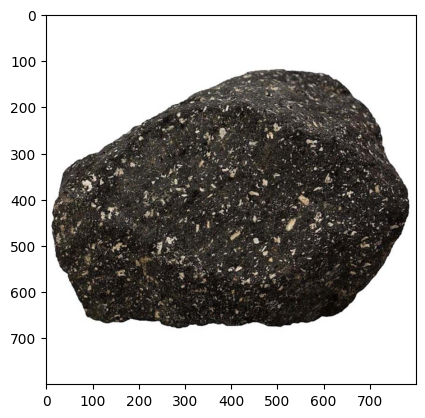

In [6]:
img = plt.imread('images/I_Andesite_01.jpg')
plt.imshow(img)

In [7]:
print(f"Shape of the Image: {img.shape}")

Shape of the Image: (800, 800, 3)


In [8]:
# Preprocessing on Original Data: to get resized original data
original_data = []
original_labels = []

for f in os.listdir('images'):
    image_path = os.path.join(image_dir, f)
    img = cv2.imread(image_path)
    if img is not None:
        original_data.append(img.flatten())
        original_labels.append(f[0])

original_data = np.array(original_data)

In [9]:
original_data.shape

(360, 1920000)

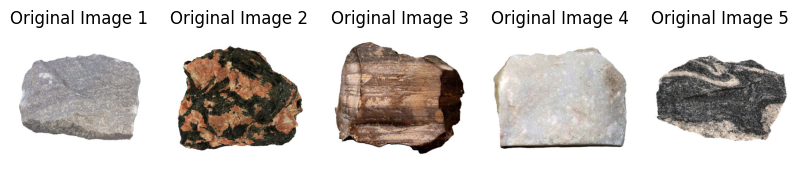

In [10]:
plt.figure(figsize=(10, 4))

# Loop through the specified number of images
for i in range(5):
    plt.subplot(1, 5, i + 1)
    img = plt.imread(os.path.join(image_dir, os.listdir(image_dir)[i]))
    plt.imshow(img)
    plt.title(f"Original Image {i + 1}")
    plt.axis('off')

plt.show()

In [11]:
# Preprocessing on Original Data: to get grayscaled and resized processed_data
processed_data = []
processed_labels = []

for f in os.listdir('images'):
    image_path = os.path.join(image_dir, f)
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is not None:
        processed_data.append(img.flatten())
        label = f[0]
        if label == 'I':
            processed_labels.append(0)
        elif label == 'M':
            processed_labels.append(1)
        elif label == 'S':
            processed_labels.append(2)

processed_data = np.array(processed_data)

In [12]:
processed_data.shape

(360, 640000)

In [13]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(processed_data)

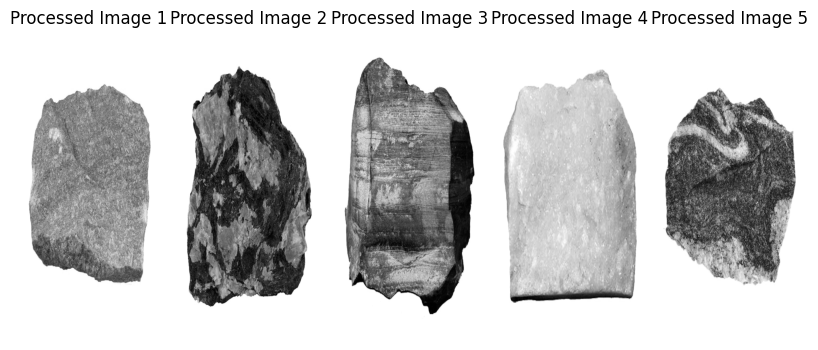

In [14]:
plt.figure(figsize=(10, 4))

# Loop through the specified number of images
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(processed_data[i].reshape((800, 800)), cmap='gray',aspect='auto')
    plt.title(f"Processed Image {i + 1}")
    plt.axis('off')

plt.show()

In [15]:
processed_data[:5]

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [16]:
scaled_data[:5]

array([[0.        , 0.        , 0.        , ..., 0.05277798, 0.05277798,
        0.07088812],
       [0.        , 0.        , 0.        , ..., 0.05277798, 0.05277798,
        0.07088812],
       [0.        , 0.        , 0.        , ..., 0.05277798, 0.05277798,
        0.07088812],
       [0.        , 0.        , 0.        , ..., 0.05277798, 0.05277798,
        0.07088812],
       [0.        , 0.        , 0.        , ..., 0.05277798, 0.05277798,
        0.07088812]])

In [17]:
original_labels[:5]

['M', 'I', 'S', 'M', 'M']

In [18]:
processed_labels[:5]

[1, 0, 2, 1, 1]

## **Apply PCA to the images from folder '360 Rocks'. How many components do you need to preserve 90% of the variance?**

In [ ]:
# Apply PCA to keep 90% of the variance
pca = PCA(0.90)
pca.fit(scaled_data)

# The number of components used to preserve 90% of the variance
n_components = pca.n_components_

print(f'Number of components to preserve 90% variance: {n_components}')

#### **Observation:**
- Looking at the above result, we need to preserve 153 components for 90% variance.

## **Plot 10 images of your choice in the original form (without PCA) and then plot their reconstruction (projection in the original space) after you kept 90% of variance using PCA.**

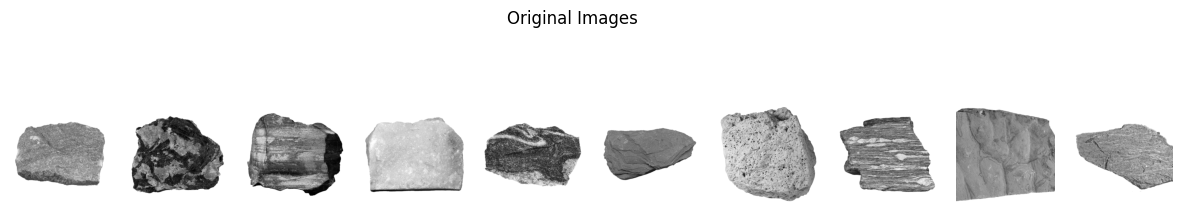

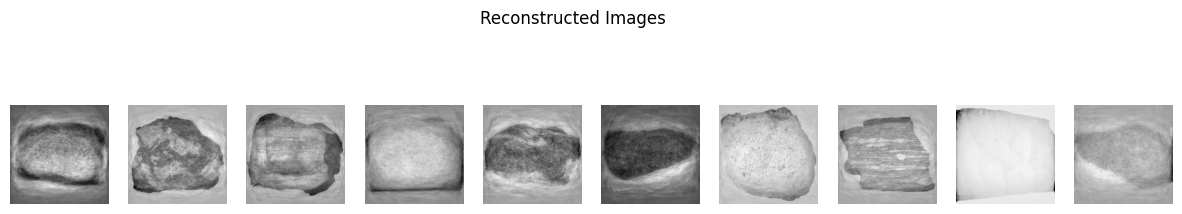

In [ ]:
# Select the first 10 images
ten_images = scaled_data[:10]

# Apply PCA transformation to reduce dimensionality
transformed_images = pca.transform(ten_images)

# Reconstruct the images from the PCA
reconstructed_images = pca.inverse_transform(transformed_images)
reconstructed_img_reshaped = reconstructed_images.reshape(-1, 800, 800)

# Function to plot images
def plot_images(images, title):
    fig, axes = plt.subplots(1, 10, figsize=(15, 3))
    for ax, image in zip(axes, images):
        ax.imshow(image, cmap='gray')
        ax.axis('off')
    plt.suptitle(title)
    plt.show()

# Plot original and reconstructed images
plot_images(processed_data.reshape(-1, 800, 800), 'Original Images')
plot_images(reconstructed_img_reshaped, 'Reconstructed Images')

- Above is the plot having 10 images in the original form without PCA and then 10 images in reconstructed form with PCA having 90% variance.

## **Each of the images belongs to one of three rock categories. The category is indicated by the first letter in the filename (I, M and S). We will now try to see if the visualization can help us identify different clusters**

### **A. Use PCA to reduce dimensionality to only 2 dimensions. How much of the variance is explained with the first two principal components?**

In [ ]:
# Apply PCA to reduce the dimensionality to 2
pca = PCA(n_components=2)
pca.fit(scaled_data)

transformed_pca = pca.transform(scaled_data)

# The proportion of variance explained by the first two principal components
explained_variance_ratio = pca.explained_variance_ratio_
total_variance_explained = sum(pca.explained_variance_ratio_)*100

print(f'Proportion of variance explained by the first two principal components: {explained_variance_ratio}')
print("Total variance explained by them: {:.2f}%".format(total_variance_explained))

Proportion of variance explained by the first two principal components: [0.183281   0.12564684]
Total variance explained by them: 30.89%


#### **Observation:**

- The first Principal Component explains 18.32% of the variance in the data.
- The second Principal Component explains 12.56% of the variance in the data.
- Together, both principal components explain 30.89% of the total variance in the data.

### **B. Plot a 2D scatter plot of the images spanned by the first two principal components. Each image will be represented with a dot. Make the color of the dot correspond to the image category (so you will have three different colors). Then add some rock images to the visualization to better understand what features in the images are accounting for the majority of variance in the data (your visualization should look similar to the one after line 71 in this file https://github.com/ageron/handson-ml3/blob/main/08_dimensionality_reduction.ipynbLinks to an external site. but with images of rocks instead of MNIST digits). Repeat the process and create the same type of plots for t-SNE, LLE and MDS.**

In [ ]:
def plot_scatter_with_labels(data, xlabel='', ylabel='', title=''):
    """
    Plot a 2D scatter plot with labels.

    Args:
    - data: 2D array-like object containing the data points to be plotted.
    - xlabel: Label for the x-axis (default: '').
    - ylabel: Label for the y-axis (default: '').
    - title: Title for the plot (default: '').

    Returns:
    - None
    """
    # Define label_symbols and colors
    label_symbols = {0: 'I', 1: 'M', 2: 'S'}
    colors = {0: 'red', 1: 'green', 2: 'blue'}

    plt.figure(figsize=(8, 8))
    for i in range(len(data)):
        label = label_symbols[processed_labels[i]]  # Get the corresponding symbol for the label
        plt.scatter(data[i, 0], data[i, 1], color=colors[processed_labels[i]], label=label)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

    handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=v, markersize=8) for v in colors.values()]
    plt.legend(handles, label_symbols.values(), title='Categories')

    plt.show()

In [ ]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import numpy as np
import matplotlib.pyplot as plt

def scatter_plot_with_images(embeddings, labels, image_list, title):
    fig, ax = plt.subplots(figsize=(12, 8))

    for category in np.unique(labels):
        indices = labels == category
        ax.scatter(embeddings[indices, 0], embeddings[indices, 1], label=category)

    # Add rock images to the plot
    for i, (x, y) in enumerate(embeddings):
        if i < len(image_list):  # To ensure we have images for each point
            image = image_list[i]
            label_text = str(labels[i])  # Convert label to string
            imagebox = OffsetImage(image, zoom=0.04, cmap='gray')
            ab = AnnotationBbox(imagebox, (x, y), frameon=False, pad=0)
            ax.add_artist(ab)
            # Add text annotation
            ax.text(x, y, label_text, color='red', fontsize=8, ha='center', va='center')

    ax.set_title(title)
    ax.set_xlabel('Dimension 1')
    ax.set_ylabel('Dimension 2')
    ax.legend()
    plt.show()

### **PCA**

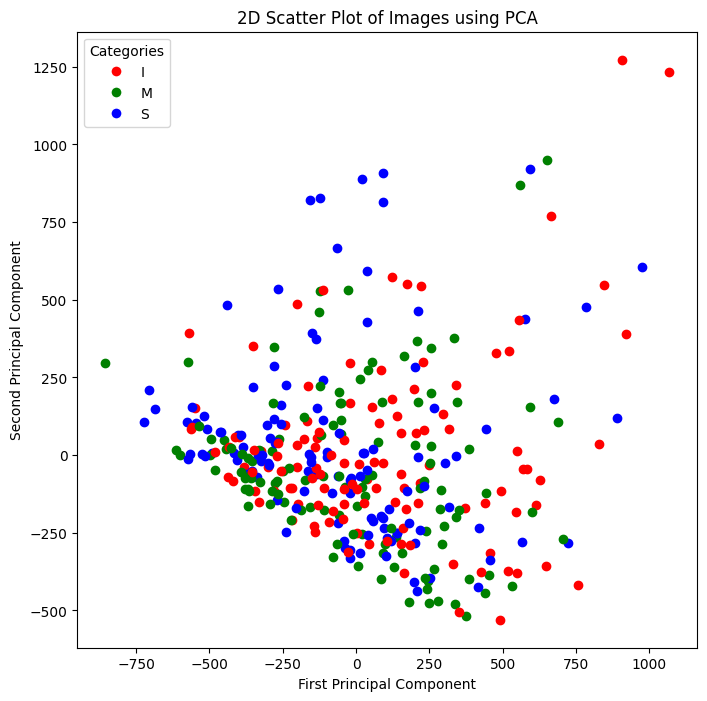

In [ ]:
plot_scatter_with_labels(transformed_pca, xlabel='First Principal Component', ylabel='Second Principal Component', title='2D Scatter Plot of Images using PCA')

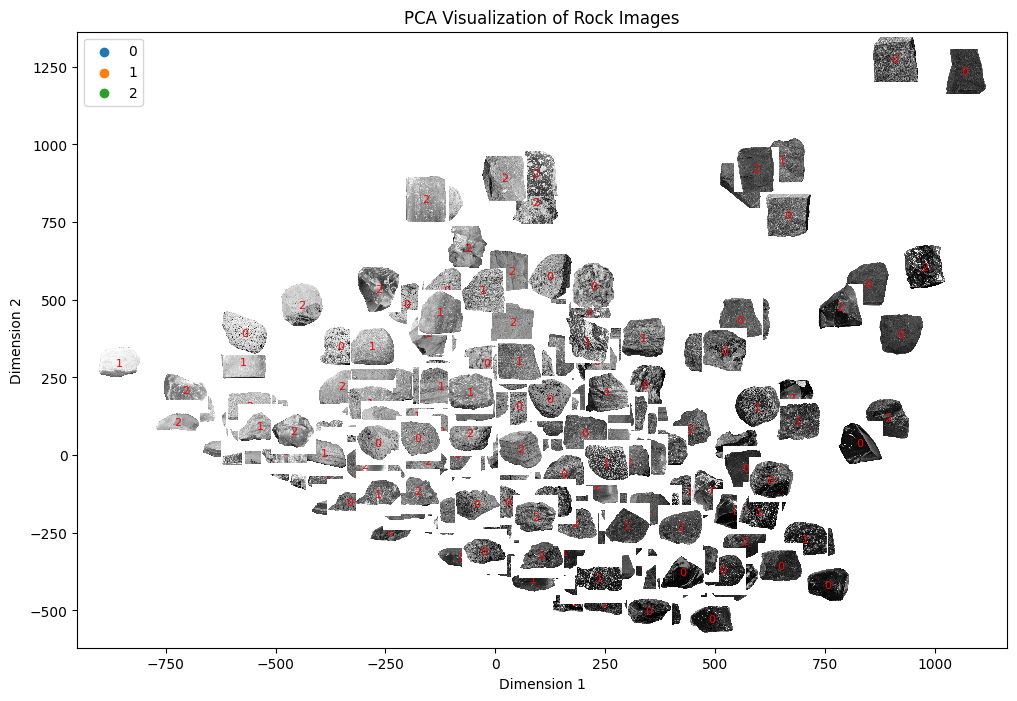

In [ ]:
scatter_plot_with_images(transformed_pca, processed_labels, processed_data.reshape(-1, 800, 800), 'PCA Visualization of Rock Images')

#### **Observations:**

- xys

#### **TSNE:**

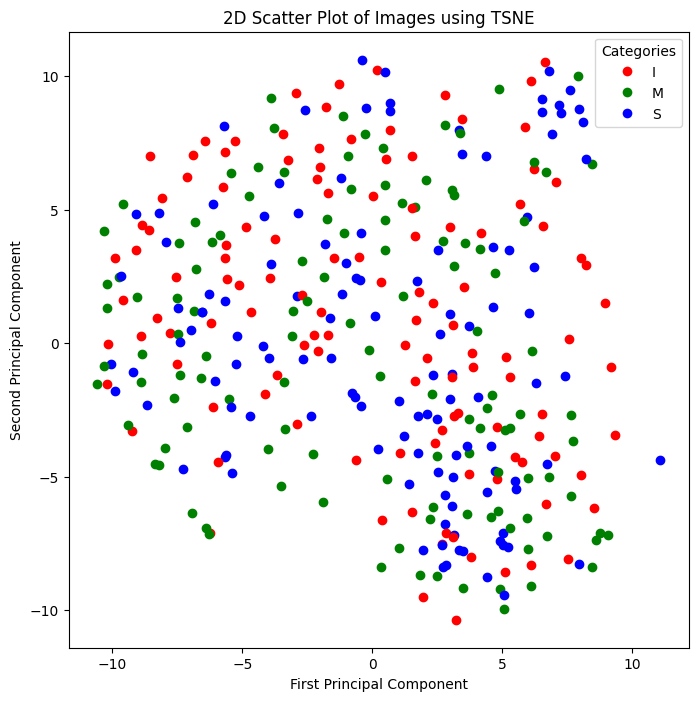

In [ ]:
tsne = TSNE(n_components=2, random_state=42)

# Fit and transform the data
transformed_tsne = tsne.fit_transform(scaled_data)

plot_scatter_with_labels(transformed_tsne, xlabel='First Principal Component', ylabel='Second Principal Component', title='2D Scatter Plot of Images using TSNE')

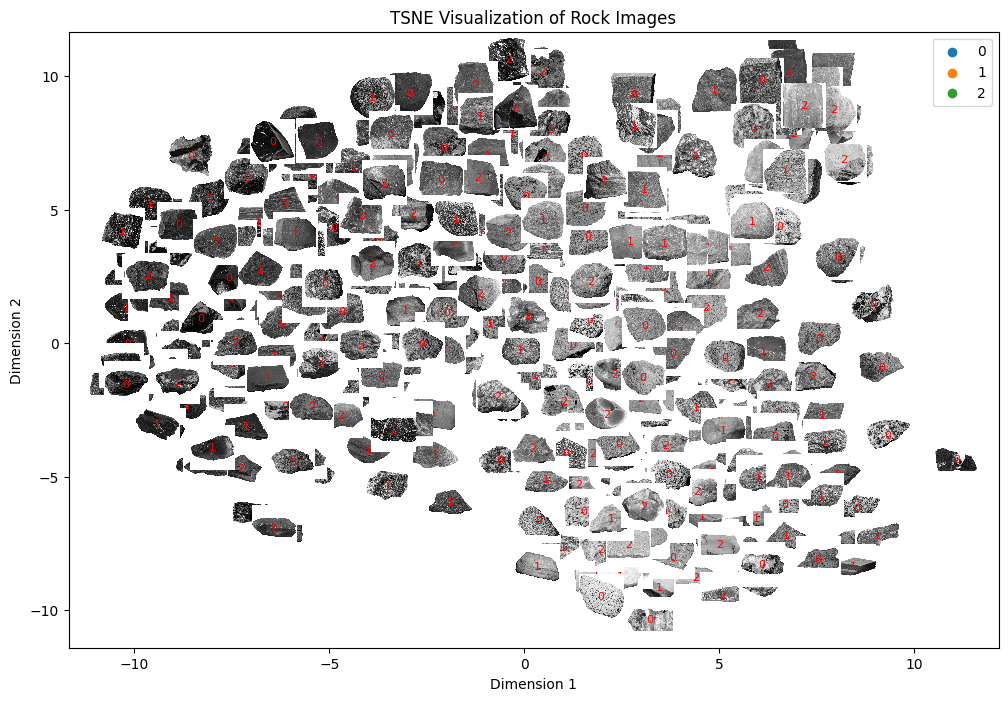

In [ ]:
scatter_plot_with_images(transformed_tsne, processed_labels, processed_data.reshape(-1, 800, 800), 'TSNE Visualization of Rock Images')

#### **Observations:**

- xys

### **LocallyLinearEmbedding:**

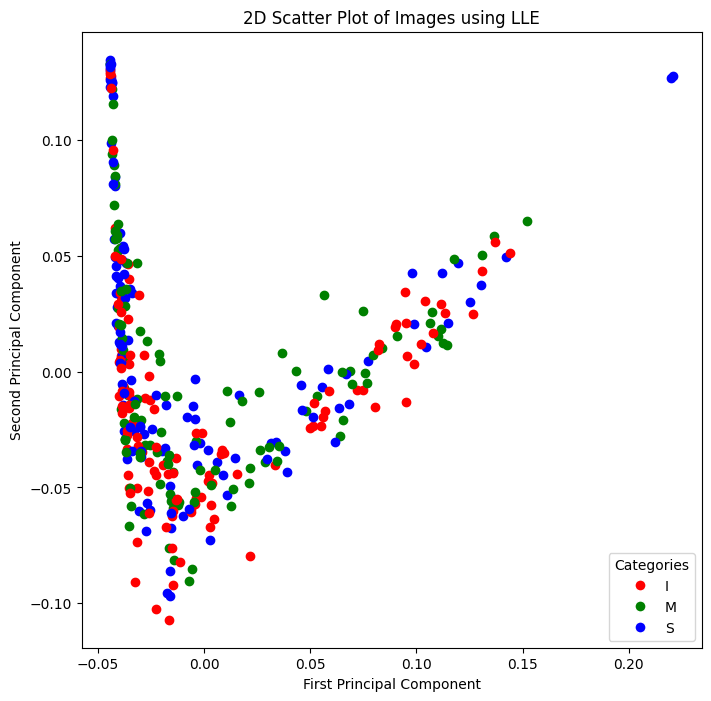

In [ ]:
lle = LocallyLinearEmbedding(n_components=2, random_state=42)

# Fit and transform the data
transformed_lle = lle.fit_transform(scaled_data)

plot_scatter_with_labels(transformed_lle, xlabel='First Principal Component', ylabel='Second Principal Component', title='2D Scatter Plot of Images using LLE')

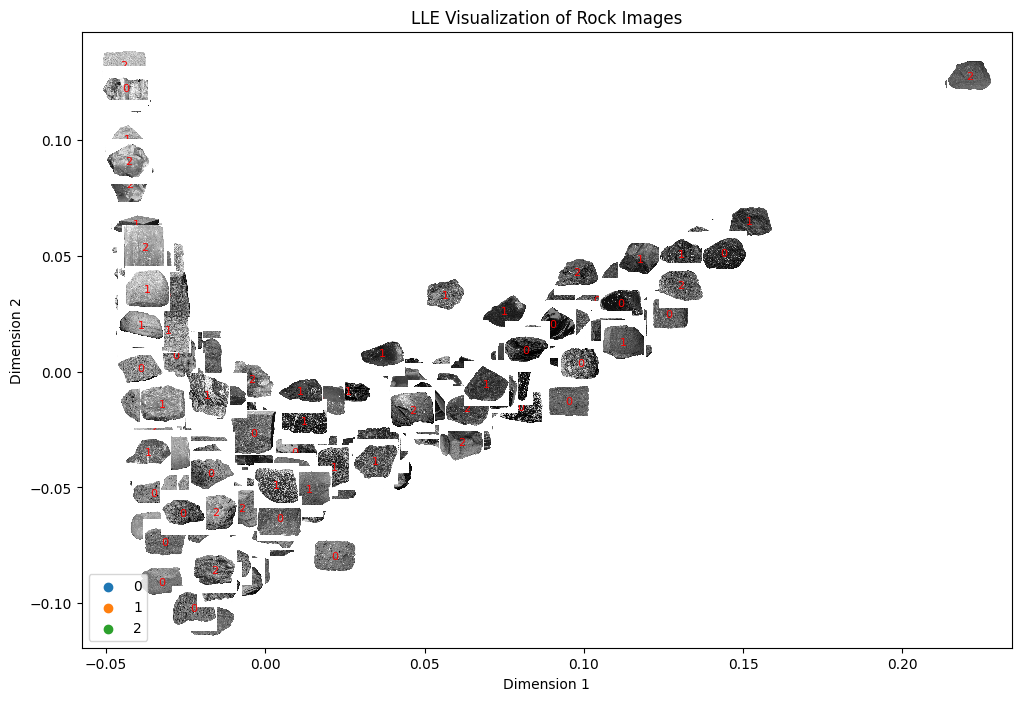

In [ ]:
scatter_plot_with_images(transformed_lle, processed_labels, processed_data.reshape(-1, 800, 800), 'LLE Visualization of Rock Images')

#### **Observations:**

- xyz

#### **MDS:**

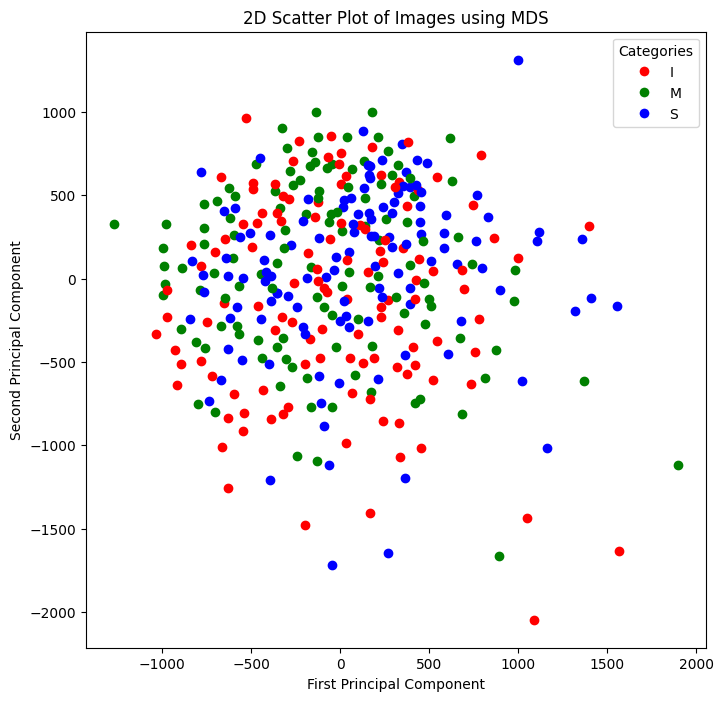

In [ ]:
mds = MDS(n_components=2, random_state=42)

transformed_mds = mds.fit_transform(scaled_data)

plot_scatter_with_labels(transformed_mds, xlabel='First Principal Component', ylabel='Second Principal Component', title='2D Scatter Plot of Images using MDS')

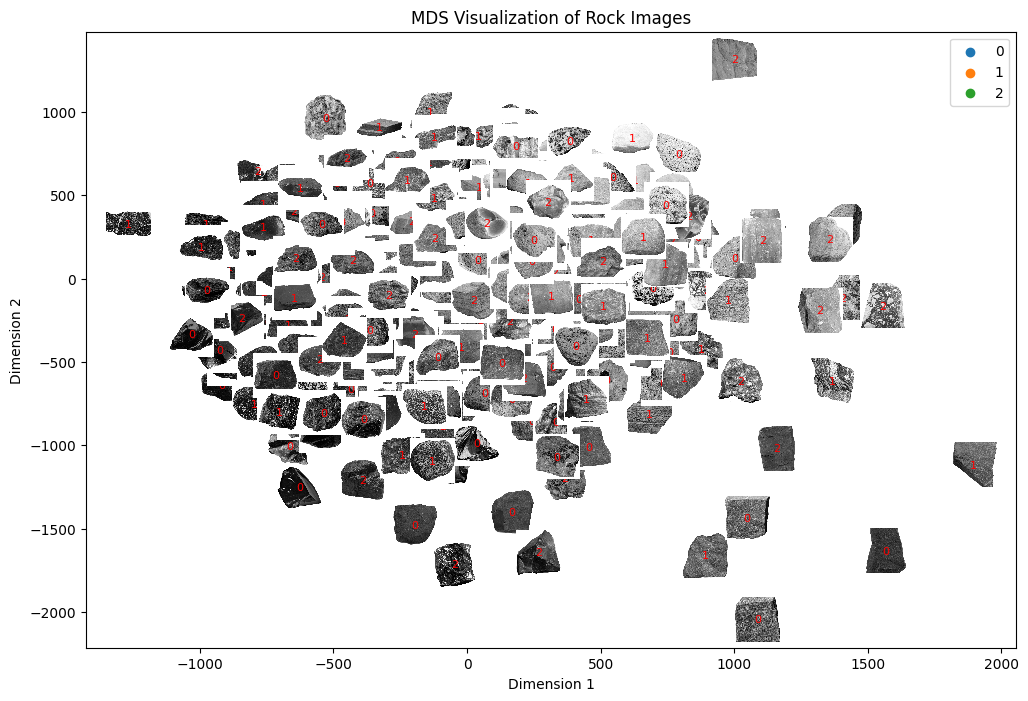

In [ ]:
scatter_plot_with_images(transformed_mds, processed_labels, processed_data.reshape(-1, 800, 800), 'MDS Visualization of Rock Images')

#### **Observations:**

- xyz

### **Discuss your observations.**

xyz

## **4. Now let's see if these dimensionality reduction techniques can give us similar features to those that humans use to judge the images. File mds_360.txt contains 8 features for each of the images (rankings are in the same order as the images in  '360 Rocks' folder. Run PCA, t-SNE, LLE and MDS to reduce the dimensionality of the images to 8. Then, compare those image embeddings with the ones from humans that are in the mds_360.txt file. Use Procrustes analysis to do the comparison (here is one example of how to do that mtx1, mtx2, disparity = procrustes(matrix_with_human_data, matrix_with_pca_embeddings_data). Here matrix_with_human_data and matrix_with_pca_embeddings_data should be 360 by 8. disparity will tell you the difference in the data. Report disparity for each of the four dimensionality reduction methods. Compute the correlation coefficient between each dimension of mtx1 and mtx2 for each of the four methods - display results in a table.**

In [ ]:
# Load the human data
# df = pd.read_csv('/content/drive/MyDrive/Applied Machine Learning/Assignment-3/Question-1/mds_360.txt', sep='\t', header=None)
df = pd.read_table('/content/drive/MyDrive/AML/assignment-3/mds_360.txt', sep='\t', header=None)
human_data = df[0].str.split().apply(lambda x: list(map(float, x))).tolist()
human_data = np.array(human_data)
human_data

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/AML/assignment-3/mds_360.txt'

In [ ]:
human_data.shape

(360, 8)

In [ ]:
# Create the models
pca = PCA(n_components=8, random_state=42)
tsne = TSNE(n_components=8, method = 'exact', random_state=42)
lle = LocallyLinearEmbedding(n_components=8, random_state=42)
mds = MDS(n_components=8, random_state=42)

# Fit and transform the data
transformed_pca = pca.fit_transform(scaled_data)
transformed_tsne = tsne.fit_transform(scaled_data)
transformed_lle = lle.fit_transform(scaled_data)
transformed_mds = mds.fit_transform(scaled_data)

In [ ]:
# Compute the Procrustes analysis and correlation coefficients for each method
def compute_correlation_and_disparity(data, transformed_data):
    disparities = {}
    correlations = {}

    methods = {'PCA': transformed_pca, 't-SNE': transformed_tsne, 'LLE': transformed_lle, 'MDS': transformed_mds}

    for method_name, embeddings in methods.items():
        # Perform Procrustes analysis
        mtx1, mtx2, disparity = procrustes(human_data, embeddings)

        correlation_coeffs = np.zeros(8)
        for i in range(8):
            correlation_coeffs[i], _ = pearsonr(mtx1[:, i], mtx2[:, i])

        disparities[method_name] = disparity
        correlations[method_name] = correlation_coeffs

    return correlations, disparities

# Calculate correlations and disparities
correlation_coefficients, disparities = compute_correlation_and_disparity(human_data, transformed_pca)

In [ ]:
# Print disparities
print("Disparities:")
for method_name, disparity in disparities.items():
    print(f"{method_name}: {disparity}")

# Print correlation coefficients
print("\nCorrelation Coefficients:")
print("Method\tDim 1\tDim 2\tDim 3\tDim 4\tDim 5\tDim 6\tDim 7\tDim 8")
for method_name, coeffs in correlation_coefficients.items():
    print(f"{method_name}\t{coeffs[0]:.3f}\t{coeffs[1]:.3f}\t{coeffs[2]:.3f}\t{coeffs[3]:.3f}\t"
          f"{coeffs[4]:.3f}\t{coeffs[5]:.3f}\t{coeffs[6]:.3f}\t{coeffs[7]:.3f}")

Disparities:
PCA: 0.990179441910259
t-SNE: 0.9862151148159972
LLE: 0.9861045092751202
MDS: 0.9883267206829198

Correlation Coefficients:
Method	Dim 1	Dim 2	Dim 3	Dim 4	Dim 5	Dim 6	Dim 7	Dim 8
PCA	0.096	0.086	0.085	0.087	0.130	0.107	0.121	0.123
t-SNE	0.117	0.083	0.053	0.186	0.089	0.169	0.084	0.161
LLE	0.104	0.139	0.093	0.139	0.111	0.118	0.061	0.187
MDS	0.112	0.094	0.133	0.101	0.089	0.110	0.127	0.120


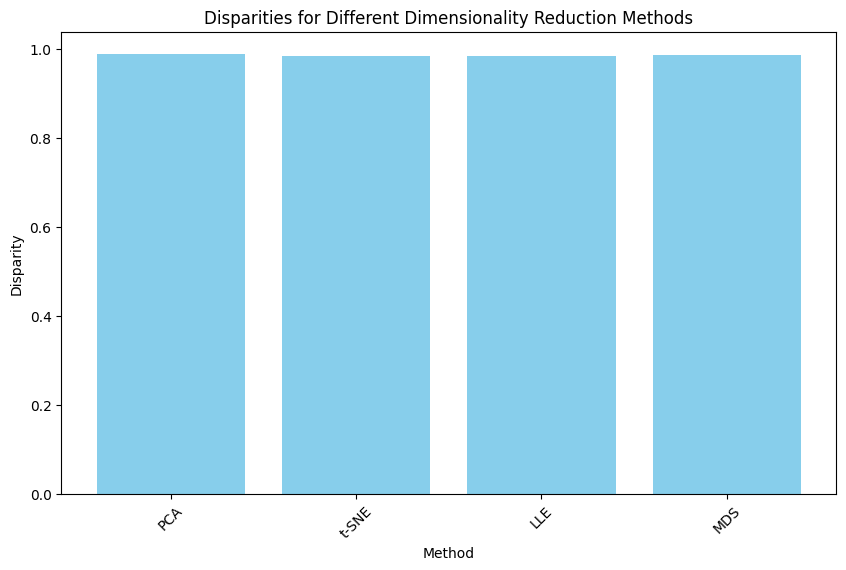

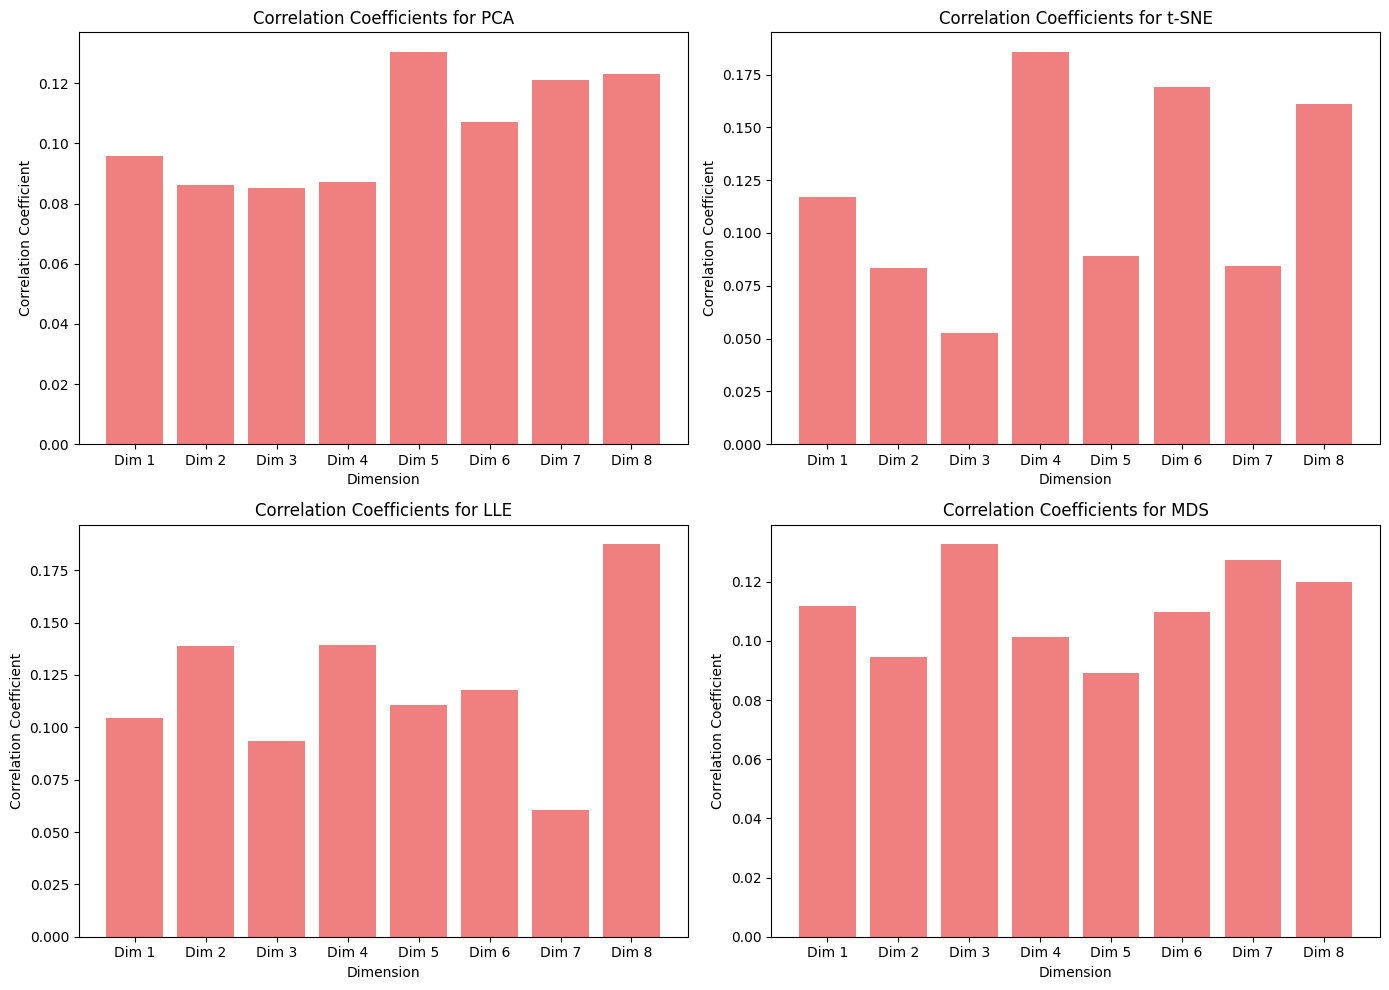

In [ ]:
# Calculate correlations and disparities
correlation_coefficients, disparities = compute_correlation_and_disparity(human_data, transformed_pca)

# Visualize disparities
plt.figure(figsize=(10, 6))
plt.bar(disparities.keys(), disparities.values(), color='skyblue')
plt.title('Disparities for Different Dimensionality Reduction Methods')
plt.xlabel('Method')
plt.ylabel('Disparity')
plt.xticks(rotation=45)
plt.show()

# Visualize correlation coefficients
methods = correlation_coefficients.keys()
dims = [f'Dim {i+1}' for i in range(8)]

fig, axs = plt.subplots(2, 2, figsize=(14, 10))

for i, (method_name, coeffs) in enumerate(correlation_coefficients.items()):
    row = i // 2
    col = i % 2
    ax = axs[row, col]
    ax.bar(dims, coeffs, color='lightcoral')
    ax.set_title(f'Correlation Coefficients for {method_name}')
    ax.set_xlabel('Dimension')
    ax.set_ylabel('Correlation Coefficient')

plt.tight_layout()
plt.show()

#### **Observations**:
- xyts

### 5A

In [ ]:
# Apply PCA to reduce the dimensionality to 2
pca = PCA(n_components=0.90, random_state=42)
transformed_pca = pca.fit_transform(scaled_data)

# Determine the number of clusters using the silhouette score
sil_scores = []
for k in range(2, 11):  # Check for k from 2 to 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(transformed_pca)
    score = silhouette_score(transformed_pca, kmeans.labels_)
    sil_scores.append(score)

optimal_k = range(2, 11)[sil_scores.index(max(sil_scores))]
print(f'The optimal number of clusters using silhouette score: {optimal_k}')

The optimal number of clusters using silhouette score: 2


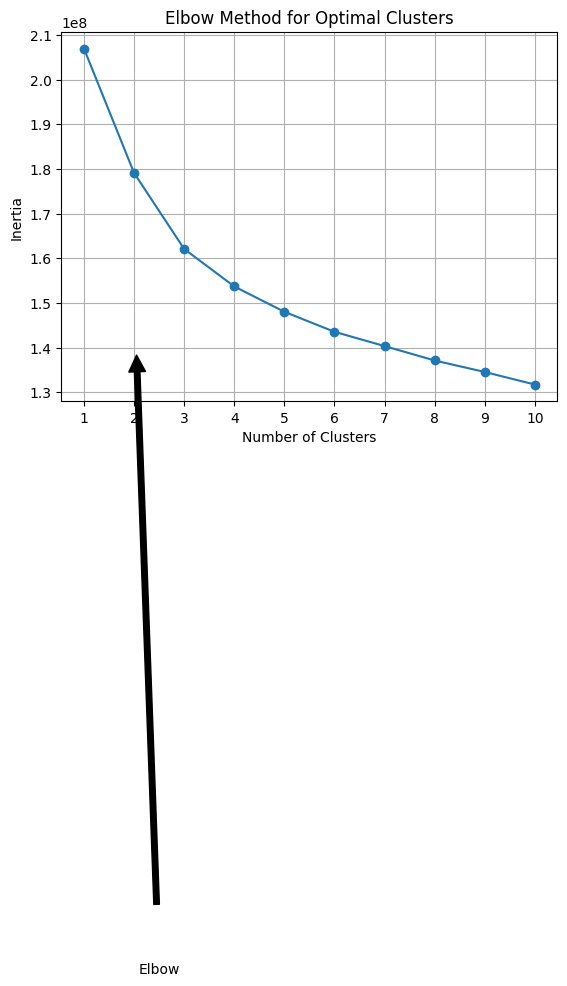

In [ ]:
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(transformed_pca)
    inertia.append(kmeans.inertia_)

# Plot the elbow method
plt.annotate("", xy=(2, inertia[3]), xytext=(2.5, 0.9),arrowprops=dict(facecolor='black', shrink=0.1))
plt.text(2.5, 0.9, "Elbow", horizontalalignment="center")
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Clusters')
plt.xticks(np.arange(1, 11, step=1))
plt.grid()
plt.show()

#### **Observations**
- 2 looks to good.

### 5B

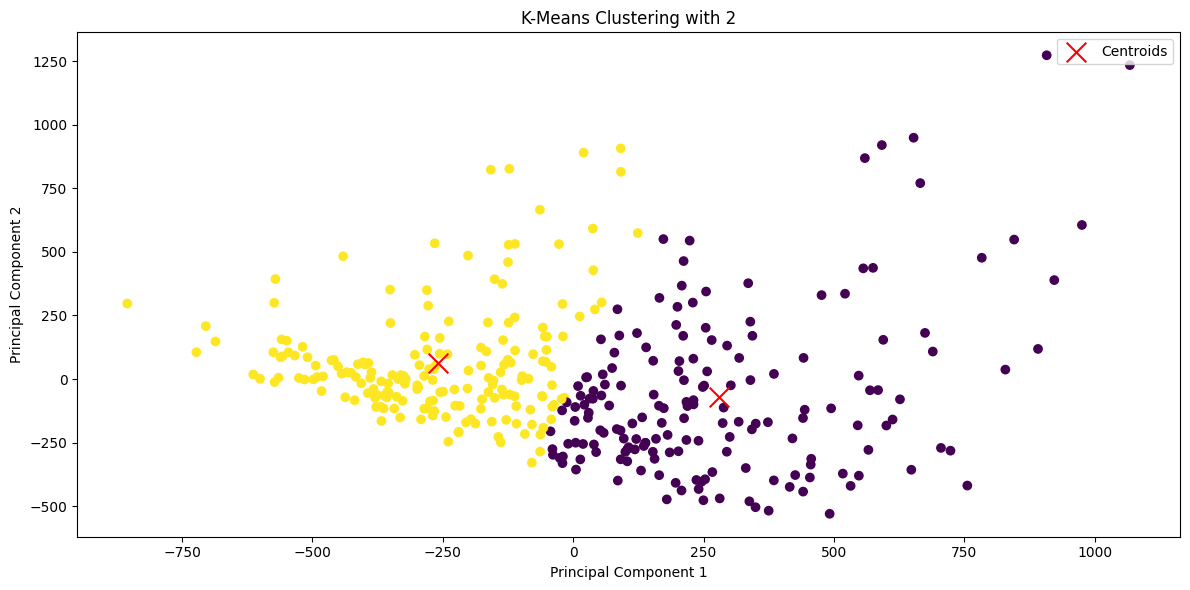

In [ ]:
# Initialize KMeans with optimal_k
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_optimal.fit(transformed_pca)

# Predict cluster labels for transformed data
cluster_labels = kmeans_optimal.predict(transformed_pca)

# Plot the scatter plot for k=2
plt.figure(figsize=(12, 6))

plt.scatter(transformed_pca[:, 0], transformed_pca[:, 1], c=cluster_labels, cmap='viridis')
plt.scatter(kmeans_optimal.cluster_centers_[:, 0], kmeans_optimal.cluster_centers_[:, 1], marker='x', color='red', s=200, label='Centroids')
plt.title(f'K-Means Clustering with {optimal_k}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.tight_layout()
plt.show()

#### **Observations:**
- 3 looks good. but not sure.

In [ ]:
# Print coordinates of the first two centroids
for i in range(2):
    centroid = kmeans_optimal.cluster_centers_[i]
    print(f"Centroid {i+1}: ({centroid[0]}, {centroid[1]})")

Centroid 1: (280.3390897108136, -68.84549667897168)
Centroid 2: (-259.35113647043175, 63.69128837145498)


In [ ]:
kmeans.inertia_

6942380.839006627

In [ ]:
silhouette_score(scaled_data, kmeans.labels_)

0.11215070236057806

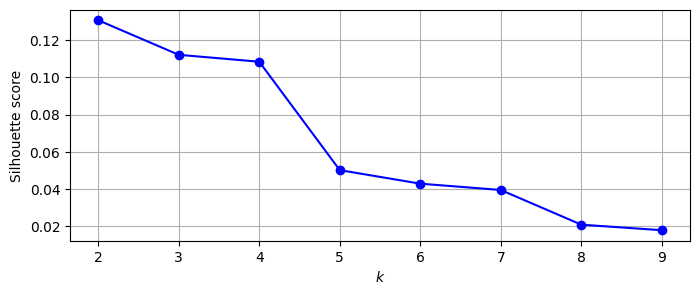

In [ ]:
silhouette_scores = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k).fit(transformed_pca)
    score = silhouette_score(scaled_data, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$")
plt.ylabel("Silhouette score")
plt.grid()
plt.show()

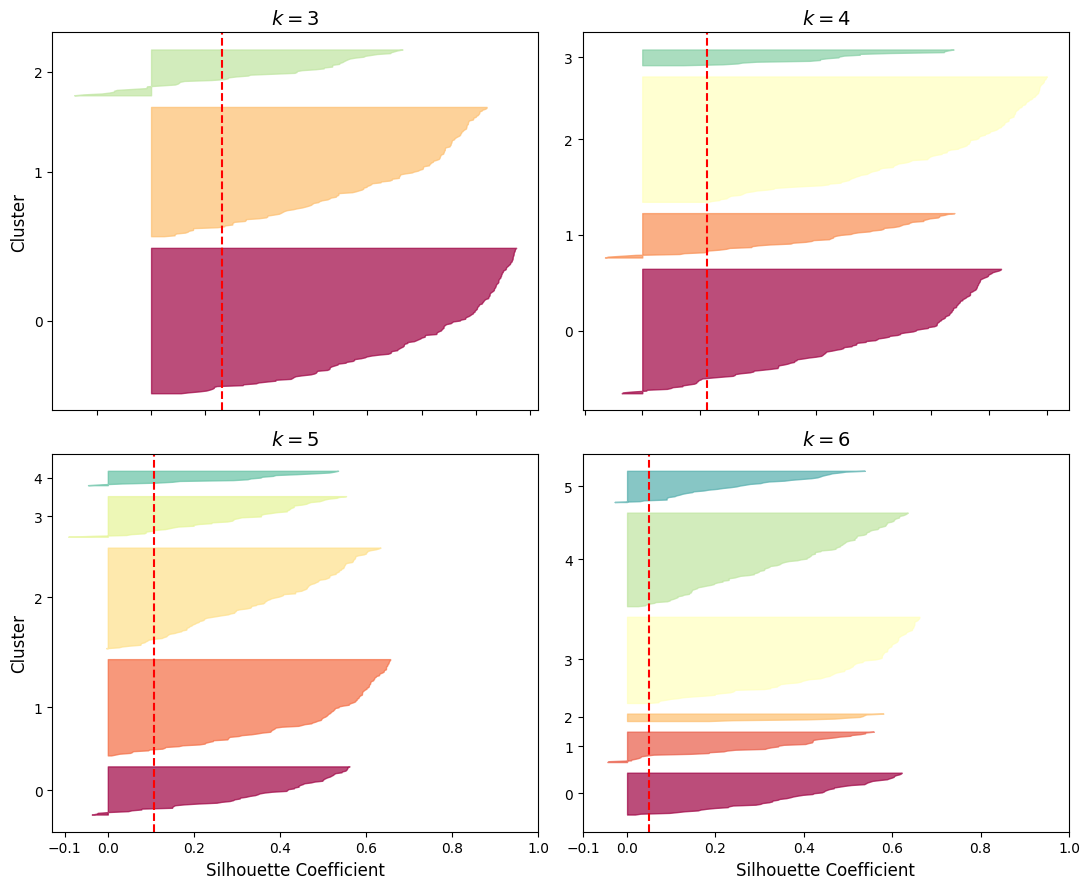

In [ ]:
plt.figure(figsize=(11, 9))

for i, k in enumerate(range(3, 7)):
    plt.subplot(2, 2, i+1)
    kmeans = KMeans(n_clusters=k).fit(transformed_pca)
    y_pred = kmeans.labels_
    silhouette_coefficients = silhouette_samples(transformed_pca, y_pred)

    padding = len(transformed_pca) // 30
    pos = padding
    ticks = []
    for cluster_label in range(k):
        coeffs = silhouette_coefficients[y_pred == cluster_label]
        coeffs.sort()

        color = plt.cm.Spectral(cluster_label / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    plt.ylabel("Cluster" if k in (3, 5) else '', fontsize=12)

    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient", fontsize=12)
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 3], color="red", linestyle="--")
    plt.title(f"$k={k}$", fontsize=14)

plt.tight_layout()
plt.show()

- We believed that the 4 is the best. As from K=5 we can see that it is gradually descreasing the value whcih might be the case of the overfitting. Thus, we can say from the above observation that K=4 is accurate.

# 6A

In [ ]:
pca = PCA(n_components=2)
transformed_pca = pca.fit_transform(scaled_data)

In [ ]:
sil_scores = []
for k in range(2, 11):  # Check for k from 2 to 10
    gmm = GaussianMixture(n_components=k)
    gmm.fit(transformed_pca)
    labels = gmm.predict(transformed_pca)
    score = silhouette_score(transformed_pca, labels)
    sil_scores.append(score)

optimal_k = range(2, 11)[sil_scores.index(max(sil_scores))]
print(f'The optimal number of clusters using silhouette score: {optimal_k}')

The optimal number of clusters using silhouette score: 2


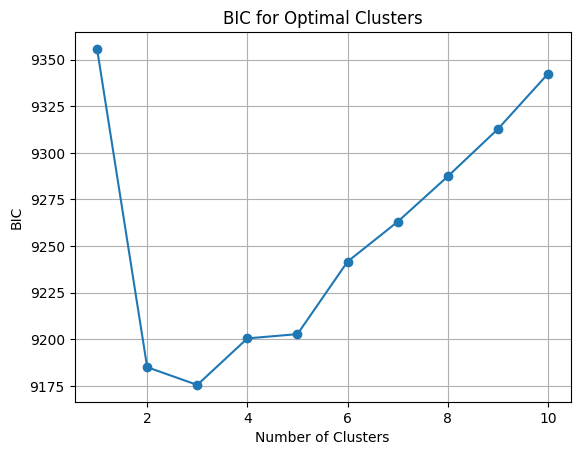

In [ ]:
bic = []
for i in range(1, 11):
    gmm = GaussianMixture(n_components=i, random_state=42)
    gmm.fit(transformed_pca)
    bic.append(gmm.bic(transformed_pca))

# Plot the BIC scores
plt.plot(range(1, 11), bic, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('BIC')
plt.title('BIC for Optimal Clusters')
plt.grid()
plt.show()

### Observations

# Question 6B

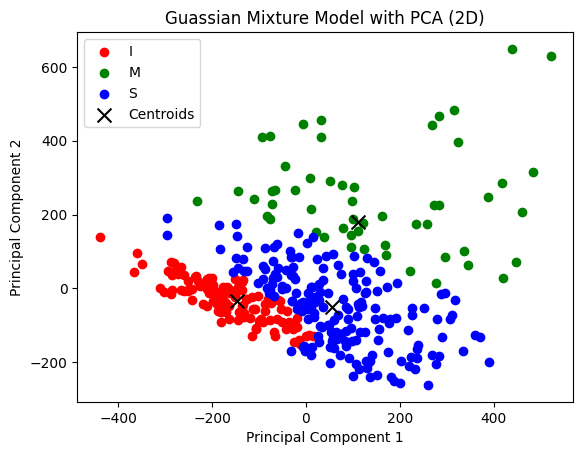

In [ ]:
color_dict = {'I': 'red', 'M': 'green', 'S': 'blue'}
optimal_k = 3  # Replace with the number you determined from the elbow method
gmm = GaussianMixture(n_components=optimal_k, random_state=42)
gmm.fit(transformed_pca)
labels = gmm.predict(transformed_pca)
rock_types = ['I', 'M', 'S']
# Visualize the clusters in 2D
for i in range(optimal_k):
    plt.scatter(transformed_pca[labels == i, 0], transformed_pca[labels == i, 1], color=color_dict[rock_types[i]], label=rock_types[i])
plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1], marker='x', s=100, c='black', label='Centroids')

plt.title('Guassian Mixture Model with PCA (2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

### Obs

In [ ]:
gmm.means_

array([[-146.50870592,  -35.06784364],
       [ 110.00509478,  178.72186468],
       [  55.46055476,  -51.19713442]])

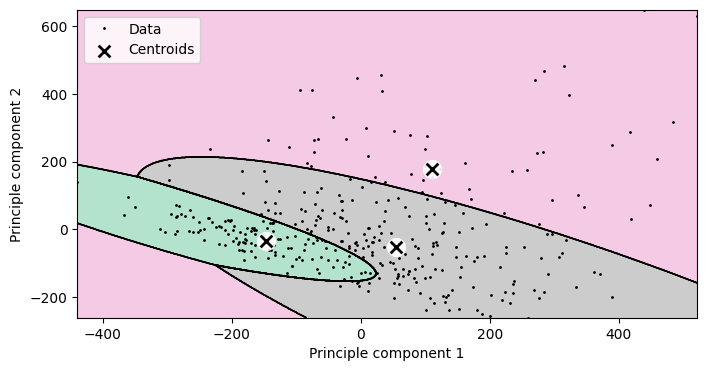

In [ ]:
def plot_gaussian_mixture(clusterer, X, resolution=1000, show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    plot_centroids(clusterer.means_, clusterer.weights_)

    if show_xlabels:
        plt.xlabel("Principle component 1")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("Principle component 2", rotation=90)
    else:
        plt.tick_params(labelleft=False)

plt.figure(figsize=(8, 4))
plot_gaussian_mixture(gmm, transformed_pca)
plt.legend()
plt.show()

In [ ]:
labels = gmm.predict(transformed_pca)
silhouette_score(transformed_pca, labels)

0.29337469140492484

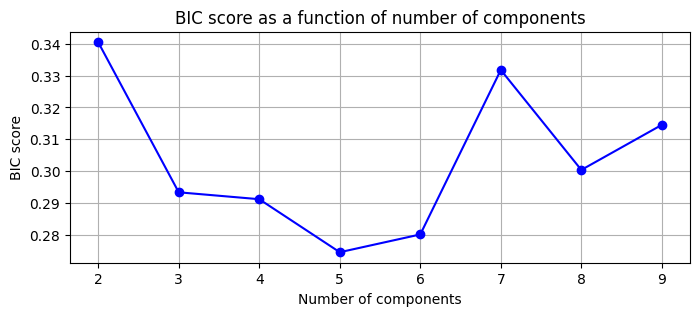

In [ ]:
silhouette_scores = []
for k in range(2, 10):
    gmm = GaussianMixture(n_components=k, random_state=42).fit(transformed_pca)
    labels = gmm.predict(transformed_pca)
    score = silhouette_score(transformed_pca, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("Number of components")
plt.ylabel("BIC score")
plt.title('BIC score as a function of number of components')
plt.grid()
plt.show()

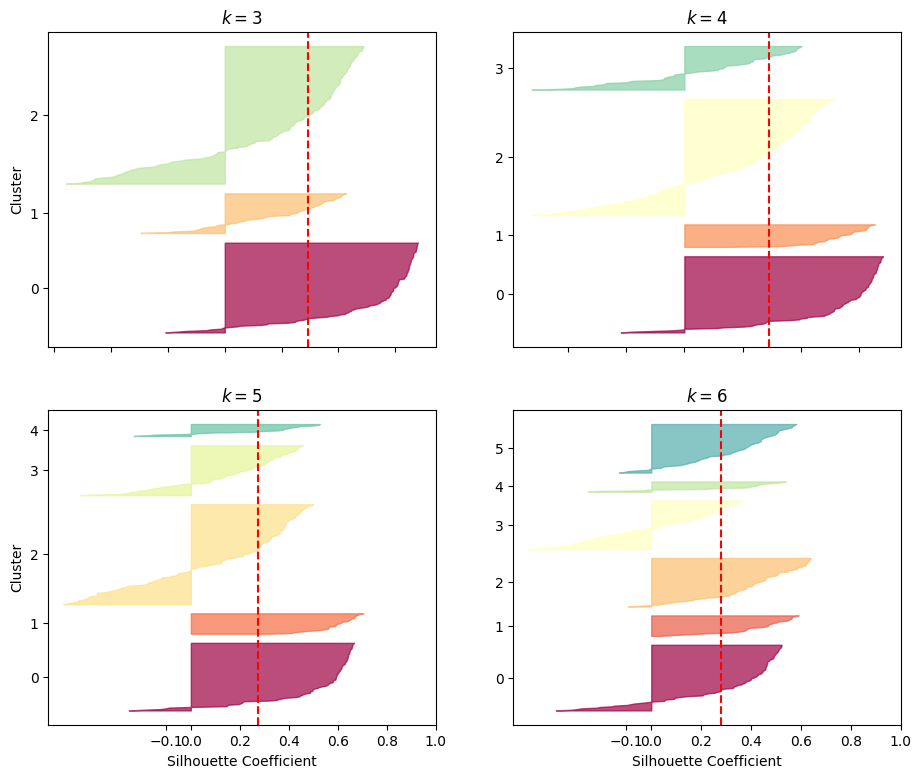

In [ ]:
plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    gmm = GaussianMixture(n_components=k, random_state=42).fit(transformed_pca)
    y_pred = gmm.predict(transformed_pca)
    silhouette_coefficients = silhouette_samples(transformed_pca, y_pred)

    padding = len(transformed_pca) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = plt.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")

    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title(f"$k={k}$")

plt.show()

### OBS

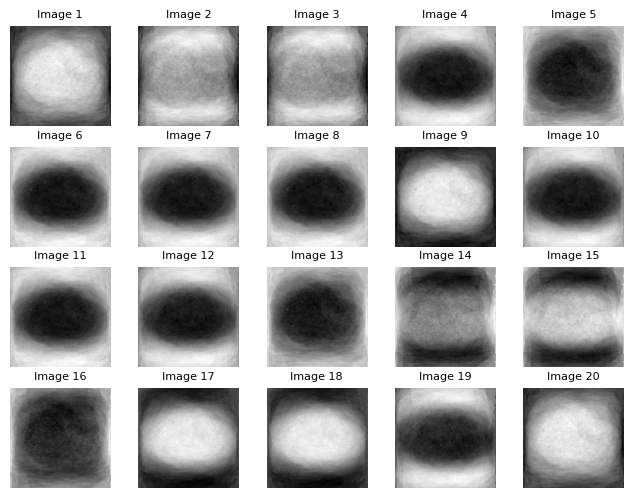

In [ ]:
new_rocks, _ = gmm.sample(20)
new_rocks = pca.inverse_transform(new_rocks)

plt.figure(figsize=(8, 6))
# Visualize the new rocks
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(new_rocks[i].reshape((400, 400)), cmap='gray')
    plt.title(f'Image {i + 1}', fontsize = 8)
    plt.axis('off')

plt.show()

# Question 7

In [ ]:
# Define paths to the training and validation datasets
# val_zip = '/content/drive/MyDrive/Applied Machine Learning/Assignment-3/Question-1/120 Rocks.zip'
val_zip = '/content/drive/MyDrive/AML/assignment-3/120 Rocks.zip'

# Create a directory to extract the images
os.makedirs('validation_data', exist_ok=True)

# Extract the images
with ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('validation_data')

# Question 7B

In [ ]:
train_dir = 'images'
validation_dir = 'validation_data'

# Get list of all image paths
image_paths = [os.path.join(train_dir, f) for f in os.listdir(train_dir) if f.endswith('.jpg')]
validation_image_paths = [os.path.join(validation_dir, f) for f in os.listdir(validation_dir) if f.endswith('.jpg')]

# Get labels from image paths
labels = [os.path.basename(path)[0] for path in image_paths]
validation_labels = [os.path.basename(path)[0] for path in validation_image_paths]

# Convert labels to integers
label_to_int = {'I': 0, 'M': 1, 'S': 2}
labels = [label_to_int[label] for label in labels]
validation_labels = [label_to_int[label] for label in validation_labels]

labels = tf.keras.utils.to_categorical(labels, num_classes=3)
validation_labels = tf.keras.utils.to_categorical(validation_labels, num_classes=3)

# Define a function to load and preprocess an image
def load_and_preprocess_image(path, label):
    image = tf.io.read_file(path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [150, 150])
    image /= 255.0  # normalize to [0,1] range
    return image, label

# Create tf.data.Dataset for training and validation data
train_dataset = tf.data.Dataset.from_tensor_slices((image_paths, labels))
train_dataset = train_dataset.map(load_and_preprocess_image)

validation_dataset = tf.data.Dataset.from_tensor_slices((validation_image_paths, validation_labels))
validation_dataset = validation_dataset.map(load_and_preprocess_image)

# Define the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')  # 3 classes: I, M, S
])

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4),
              metrics=['accuracy'])

# Train the model
start_time = time.time()
history = model.fit(
    train_dataset.batch(20),
    steps_per_epoch=18,  # 360 images = batch_size * steps
    epochs=30,
    validation_data=validation_dataset.batch(20),
    validation_steps=6,  # 120 images = batch_size * steps
    verbose=2)
end_time = time.time()

Epoch 1/30
18/18 - 24s - loss: 1.1193 - accuracy: 0.3083 - val_loss: 1.0986 - val_accuracy: 0.3667 - 24s/epoch - 1s/step
Epoch 2/30
18/18 - 25s - loss: 1.0986 - accuracy: 0.3333 - val_loss: 1.0986 - val_accuracy: 0.3667 - 25s/epoch - 1s/step
Epoch 3/30
18/18 - 27s - loss: 1.0986 - accuracy: 0.3333 - val_loss: 1.0986 - val_accuracy: 0.3667 - 27s/epoch - 2s/step
Epoch 4/30
18/18 - 24s - loss: 1.0986 - accuracy: 0.3333 - val_loss: 1.0986 - val_accuracy: 0.3667 - 24s/epoch - 1s/step
Epoch 5/30
18/18 - 23s - loss: 1.0986 - accuracy: 0.3333 - val_loss: 1.0986 - val_accuracy: 0.3667 - 23s/epoch - 1s/step
Epoch 6/30
18/18 - 25s - loss: 1.0986 - accuracy: 0.3333 - val_loss: 1.0986 - val_accuracy: 0.3667 - 25s/epoch - 1s/step
Epoch 7/30
18/18 - 23s - loss: 1.0986 - accuracy: 0.3333 - val_loss: 1.0986 - val_accuracy: 0.3667 - 23s/epoch - 1s/step
Epoch 8/30
18/18 - 26s - loss: 1.0986 - accuracy: 0.3333 - val_loss: 1.0986 - val_accuracy: 0.3667 - 26s/epoch - 1s/step
Epoch 9/30
18/18 - 26s - loss: 1

# Question 7A

Training time:  1147.131029844284


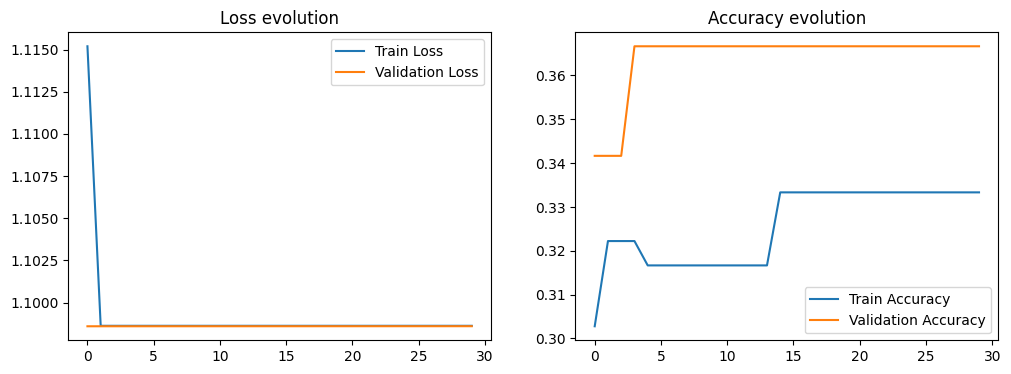

In [ ]:
# Report the training time
print("Training time: ", end_time - start_time)

# Plot training and validation loss and accuracy as a function of training epochs
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss evolution')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy evolution')

plt.show()

# Observation

# Question 7C

In [ ]:
# Report the number of parameters in the network
print("Total parameters: ", model.count_params())

# Report the number of bias parameters in the network
bias_count = np.sum([np.prod(b.shape) for b in model.get_weights() if len(b.shape)==1])
print("Bias parameters: ", bias_count)

Total parameters:  19037795
Bias parameters:  747


In [ ]:
# Compare the activity of neurons in the next to the last layer with the human data
# Extract the outputs of the next to the last layer
layer_output = model.layers[-2].output
activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_output)

# Use the model to predict the outputs
activations_train = activation_model.predict(train_dataset.batch(20))
activations_val = activation_model.predict(validation_dataset.batch(20))

pca = PCA(n_components=8)

# Fit the PCA model to the data and apply the dimensionality reduction
activations_val_pca = pca.fit_transform(activations_val.reshape(activations_val.shape[0], -1))

# Load the human data
# human_data_train = np.loadtxt('/content/drive/MyDrive/Applied Machine Learning/Assignment-3/Question-1/mds_360.txt')
human_data_train = np.loadtxt('/content/drive/MyDrive/AML/assignment-3/mds_360.txt')
human_data_val = np.loadtxt('/content/drive/MyDrive/AML/assignment-3/mds_120.txt')

18/18 [==============================] - 7s 394ms/step


In [ ]:
human_data_val.shape

(120, 8)

In [ ]:
activations_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
import numpy as np

# Assuming activations_train is your array
contains_nonzero = np.any(activations_train != 0)

if contains_nonzero:
    print("The array contains values other than 0.")
else:
    print("The array only contains 0 values.")

The array only contains 0 values.


In [ ]:
activations_val.shape

(360, 8)

# Question 7D

In [ ]:
# Perform Procrustes analysis
mtx1_train, mtx2_train, disparity_train = procrustes(activations_train, human_data_train)
mtx1_val, mtx2_val, disparity_val = procrustes(activations_val[:120], human_data_val)

# Report disparity
print("Disparity (train): ", disparity_train)
print("Disparity (validation): ", disparity_val)

# Compute the correlation coefficient between each dimension of mtx1 and mtx2
correlation_train = [pearsonr(mtx1_train[:, i], mtx2_train[:, i])[0] for i in range(mtx1_train.shape[1])]
correlation_val = [pearsonr(mtx1_val[:, i], mtx2_val[:, i])[0] for i in range(mtx1_val.shape[1])]

# Display results in a table
print("Correlation (train): ", correlation_train)
print("Correlation (validation): ", correlation_val)

ValueError: Input matrices must contain >1 unique points